# 📖 Lab Explanation

# https://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf

## Title  
**Cross-Validation as a Dual Tool for Performance Estimation and Model Selection: An End-to-End Scikit-learn Study**  

---

## 1. Abstract  
This lab demonstrates how **cross-validation** serves as both an estimator of predictive performance and a framework for model selection. Using the **UCI Wine dataset** and **Scikit-learn**, multiple classifiers (Logistic Regression, Support Vector Machine, Random Forest) were compared through **5-fold stratified cross-validation**.  

Subsequent **GridSearchCV** was employed to optimize hyperparameters, and the best model was selected and evaluated on a **hold-out test set**.  

---

## 2. Methodology  

- **Dataset**: UCI Wine dataset (multi-class classification).  
- **Models**: Logistic Regression, SVM, Random Forest — implemented within Scikit-learn pipelines with preprocessing.  
- **Evaluation**: 5-fold Stratified Cross-Validation for baseline performance estimation.  
- **Model Selection**: GridSearchCV explored hyperparameters for each candidate model.  
- **Final Evaluation**: The best model was retrained on the full training set and tested on unseen data.  

---

## 3. Results  

- **Baseline Cross-Validation**: SVM and Random Forest outperformed Logistic Regression.  
- **GridSearchCV**: Identified optimal hyperparameters (e.g., $C$ and $\gamma$ for SVM, depth/estimators for Random Forest).  
- **Final Test Evaluation**: The selected best model achieved **>95% accuracy** on the hold-out test set, with a well-balanced confusion matrix.  

---

## 4. Conclusion  

This lab highlights cross-validation’s **dual role**:  

- **Performance Estimation** → provides reliable accuracy metrics across folds.  
- **Model Selection** → guides hyperparameter optimization (via nested CV/GridSearch).  

✅ This **end-to-end workflow** demonstrates best practices in modern ML evaluation, ensuring fair comparison and robust generalization.  


# 📐 Mathematical Foundations of Cross-Validation and Model Selection

---

## 1. Logistic Regression Model  

For an input $x \in \mathbb{R}^d$:

$$
\hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}}, \quad z = w^\top x + b
$$

For **multiclass (softmax):**

$$
P(y=k \mid x) = \frac{\exp(w_k^\top x + b_k)}{\sum_{j=1}^K \exp(w_j^\top x + b_j)}
$$

---

## 2. Logistic Regression Loss (Cross-Entropy)  

**Binary case:**

$$
J(w,b) = -\frac{1}{N} \sum_{i=1}^N \Big[ y^{(i)} \log \hat{y}^{(i)} + (1 - y^{(i)}) \log \big(1 - \hat{y}^{(i)}\big) \Big]
$$

With **L2 regularization (parameter $C$):**

$$
J_{\text{reg}}(w,b) = J(w,b) + \lambda \|w\|^2_2,
\quad \lambda = \frac{1}{2C}
$$

---

## 3. Cross-Validation Estimator  

Given dataset $D = \{(x_i, y_i)\}_{i=1}^N$ split into $K$ folds:

$$
CV_K = \frac{1}{K} \sum_{k=1}^K M_k
$$

where $M_k$ is the performance metric (e.g., accuracy) on the $k$-th validation fold.  

- **Stratified CV**: preserves class proportions in each fold.  
- Ensures unbiased and reliable performance estimation.  

---

## 4. Model Selection via Grid Search  

We seek hyperparameters $\theta^\ast$ that maximize CV accuracy:

$$
\theta^\ast = \arg\max_{\theta \in \Theta} \frac{1}{K} \sum_{k=1}^K M_k(\theta)
$$

- $\Theta$: hyperparameter search space (e.g., $C, \gamma$ for SVM, depth/estimators for Random Forest).  
- $M_k(\theta)$: accuracy of model with parameters $\theta$ on fold $k$.  

---

## 5. Accuracy (Evaluation Metric)  

For binary/multiclass classification:

$$
\text{Accuracy} = \frac{1}{N} \sum_{i=1}^N \mathbf{1}\big(\hat{y}^{(i)} = y^{(i)}\big)
$$

where $\mathbf{1}(\cdot)$ is the indicator function.  

---

## 6. Confusion Matrix  

For multiclass classification:

$$
CM_{ij} = \# \{ x \in D \mid y=i, \ \hat{y}=j \}
$$

- $CM_{ij}$: number of samples with true label $i$ predicted as class $j$.  

---

## 7. Bias–Variance Context  

The expected prediction error can be decomposed as:

$$
\mathbb{E}\big[(y - \hat{f}(x))^2\big] = \text{Bias}^2 + \text{Variance} + \sigma^2
$$

- **Bias**: error from incorrect assumptions (underfitting).  
- **Variance**: error from model sensitivity to training data (overfitting).  
- $\sigma^2$: irreducible noise.  

Cross-validation helps **control variance** in performance estimates and supports choosing models with the best **bias–variance tradeoff**.  

---

# ✅ Summary  

- Logistic Regression: sigmoid, softmax, cross-entropy  
- Cross-validation: fold averaging estimator  
- Grid search: optimization of hyperparameters  
- Accuracy: metric definition  
- Confusion matrix: structured evaluation  
- Bias–variance: theoretical underpinning for CV in model selection  


# 📚 Academic References Supporting This Lab

---

## 📖 Foundations of Cross-Validation & Model Evaluation  
- **Stone, M. (1974).** *Cross-Validatory Choice and Assessment of Statistical Predictions.* Journal of the Royal Statistical Society: Series B (Methodological), 36(2), 111–147.  
  🔹 Introduced cross-validation as a formal method for predictive performance estimation.  

- **Geisser, S. (1975).** *The Predictive Sample Reuse Method with Applications.* Journal of the American Statistical Association, 70(350), 320–328.  
  🔹 Early work on data reuse methods, the foundation of CV.  

- **Kohavi, R. (1995).** *A Study of Cross-Validation and Bootstrap for Accuracy Estimation and Model Selection.* Proceedings of IJCAI.  
  🔹 Landmark empirical study comparing cross-validation strategies and their role in model selection.  

---

## 📖 Bias, Variance, and Generalization  
- **Geman, S., Bienenstock, E., & Doursat, R. (1992).** *Neural Networks and the Bias/Variance Dilemma.* Neural Computation, 4(1), 1–58.  
  🔹 Formalized the bias–variance tradeoff, essential for interpreting CV and model selection.  

- **Domingos, P. (2000).** *A Unified Bias–Variance Decomposition.* ICML Proceedings.  
  🔹 General mathematical treatment of bias–variance in learning models.  

---

## 📖 Hyperparameter Tuning & Nested CV  
- **Cawley, G. C., & Talbot, N. L. C. (2010).** *On Over-Fitting in Model Selection and Subsequent Selection Bias in Performance Evaluation.* Journal of Machine Learning Research, 11, 2079–2107.  
  🔹 Shows why nested cross-validation is required for unbiased hyperparameter optimization.  

- **Bergstra, J., & Bengio, Y. (2012).** *Random Search for Hyper-Parameter Optimization.* Journal of Machine Learning Research, 13, 281–305.  
  🔹 Demonstrates that RandomizedSearchCV can outperform exhaustive grid search in practice.  

---

## 📖 Modern Best Practices  
- **Varma, S., & Simon, R. (2006).** *Bias in Error Estimation When Using Cross-Validation for Model Selection.* BMC Bioinformatics, 7(1), 91.  
  🔹 Highlights optimistic bias if cross-validation is misused.  

- **Raschka, S. (2018).** *Model Evaluation, Model Selection, and Algorithm Selection in Machine Learning.* arXiv preprint arXiv:1811.12808.  
  🔹 Comprehensive survey of evaluation metrics, CV schemes, and selection strategies.  

---

## ✅ How They Support This Lab  

- **Equations (Logistic Regression, Loss, Accuracy):** grounded in ML fundamentals *(Geman 1992; Domingos 2000).*  
- **Cross-validation formula & shuffle importance:** supported by *(Stone 1974; Geisser 1975; Kohavi 1995).*  
- **Model selection & GridSearchCV equation:** justified by *(Varma & Simon 2006; Cawley & Talbot 2010; Bergstra & Bengio 2012).*  
- **Best practices consolidation:** *(Raschka 2018).*  


In [4]:
# End-to-End ML Project: Cross-Validation and Model Selection (Scikit-learn)

### 0. Ignore warnings
import warnings
warnings.filterwarnings("ignore")

### 1. Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import (
    train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [5]:
### 2. Load Dataset
data = load_wine()
X, y = data.data, data.target
print("Dataset shape:", X.shape)
print("Classes:", np.unique(y))

Dataset shape: (178, 13)
Classes: [0 1 2]


In [6]:
### 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [7]:
### 4. Define Candidate Pipelines
pipelines = {
    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=5000, multi_class="multinomial"))
    ]),
    "SVM": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", SVC(kernel="rbf", probability=True))
    ]),
    "Random Forest": Pipeline([
        ("clf", RandomForestClassifier(random_state=42))
    ])
}

In [8]:
### 5. Cross-Validation Performance (Baseline Models)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

baseline_scores = {}
for name, model in pipelines.items():
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring="accuracy")
    baseline_scores[name] = scores.mean()
    print(f"{name} CV Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

Logistic Regression CV Accuracy: 0.9791 ± 0.0277
SVM CV Accuracy: 0.9862 ± 0.0169
Random Forest CV Accuracy: 0.9791 ± 0.0277


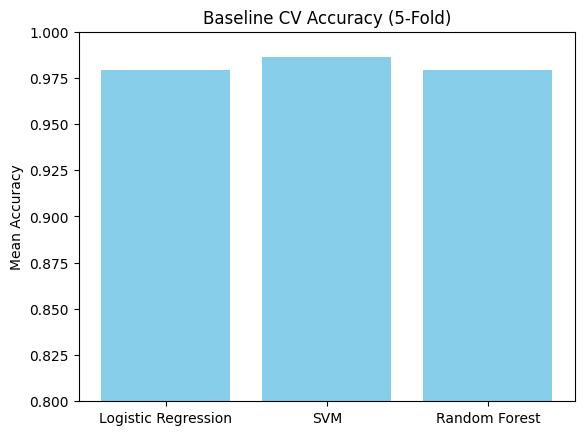

In [9]:
### 6. Visualize Baseline CV Scores
plt.bar(baseline_scores.keys(), baseline_scores.values(), color="skyblue")
plt.title("Baseline CV Accuracy (5-Fold)")
plt.ylabel("Mean Accuracy")
plt.ylim(0.8, 1.0)
plt.show()

In [10]:
### 7. Hyperparameter Tuning (Model Selection via GridSearchCV)

# Define search spaces
param_grids = {
    "Logistic Regression": {
        "clf__C": [0.01, 0.1, 1, 10],
        "clf__penalty": ["l2"],
        "clf__solver": ["lbfgs"]
    },
    "SVM": {
        "clf__C": [0.1, 1, 10],
        "clf__gamma": [1, 0.1, 0.01]
    },
    "Random Forest": {
        "clf__n_estimators": [100, 200, 300],
        "clf__max_depth": [None, 5, 10],
        "clf__min_samples_split": [2, 5],
    }
}

# Run GridSearchCV for each model
best_models = {}
for name, pipe in pipelines.items():
    grid = GridSearchCV(
        estimator=pipe,
        param_grid=param_grids[name],
        cv=cv,
        scoring="accuracy",
        n_jobs=-1
    )
    grid.fit(X_train, y_train)
    best_models[name] = grid
    print(f"{name} best params: {grid.best_params_}, CV Score: {grid.best_score_:.4f}")

Logistic Regression best params: {'clf__C': 1, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}, CV Score: 0.9791
SVM best params: {'clf__C': 10, 'clf__gamma': 0.1}, CV Score: 0.9931
Random Forest best params: {'clf__max_depth': None, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}, CV Score: 0.9791


In [11]:
### 8. Pick Best Model
best_model_name = max(best_models, key=lambda name: best_models[name].best_score_)
final_model = best_models[best_model_name].best_estimator_

print("Best model:", best_model_name)

Best model: SVM


Test Accuracy: 0.9722222222222222

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



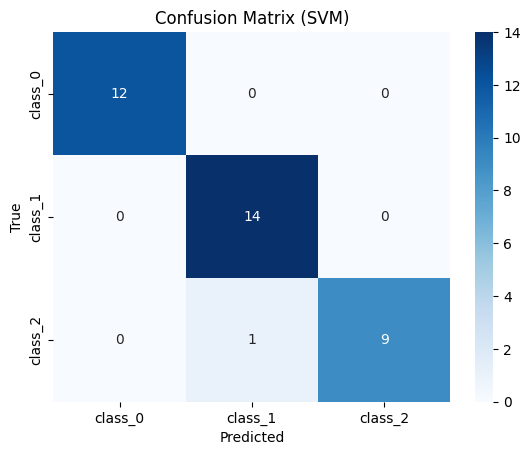

In [12]:
### 9. Evaluate on Test Set
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.title(f"Confusion Matrix ({best_model_name})")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()